## Preserving Privacy on Sensitive Questions

When taking surveys from people, the possibility of lying is not always taken into account. For example, think about surveying the rate of cheating in an exam. Simply asking "Did you cheat in the last exam?" is completely absurd, as no sane person would ever admit to cheating in an exam he just took, even if there were no consequences to his admittance.

Below is a proposed algorithm for preserving privacy for sensitive questions, but first, let's create our testing data.

In [92]:
### IMPORTS

%matplotlib inline
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import numpy as np

#set font size of plots to 22
matplotlib.rcParams.update({"font.size":22})

In [93]:
p = 0.1 # hard-coded probability of cheaters
        # we do not know this, so we cannot use this as a variable in our calculations later
        # we only use this to check our answers later on

N = 100 # the number of students that took the test

np.random.seed(1) # random seed; forces the result to be only one answer every time
ground_truth = np.random.choice(range(2), size=N, p=[1-p, p])   # the ground truth, 
                                                                # 0 = 'no i did not cheat'
                                                                # 1 = 'yes i cheated'

## The Privacy Algorithm

Instead of asking whether students have cheated on their last exam or not, we can instead use another algorithm that can at least try to ensure honest answers:

> In the interview process for each student, the student flips a coin, hidden from the interviewer. The student agrees to answer honestly if the coin comes up heads. Otherwise, if the coin comes up tails, the student (secretly) flips the coin again, and answers "Yes, I did cheat" if the coin flip lands heads, and "No, I did not cheat", if the coin flip lands tails. This way, the interviewer does not know if a "Yes" was the result of a guilty plea, or a Heads on a second coin toss. Thus privacy is preserved and the researchers receive honest answers.

This is called the Privacy Algorithm. The privacy of all the cheaters who answered 'Yes' truthfully is preserved since some Yes's are not confessions but instead randomness, and the other 'Yes' answers are just simply noise.

Note: of course, this does not stop the cheater from lying. But at least it's better than having no data at all!

In [94]:
# simulating the coinflips

np.random.seed(1) # random seed; forces the result to be only one answer every time

coinflip1 = np.random.choice(range(2), size=N)      # coinflip 1
                                                    # if heads, answer honestly
                                                    # if tails, flip again
        
coinflip2 = np.random.choice(range(2), size=N)      # coinflip 2
                                                    # if heads, answer "Yes"
                                                    # if tails, answer "No"
        
data = ground_truth*coinflip1 + (1-coinflip1)*coinflip2
YES = 1
NO = 0

## You're up!

Perform a Bayesian analysis to find the proportion of cheaters given this setup. Note that our data is deterministic, so the class' answers should be exactly the same.

Be reminded that you are not allowed to use the variables we marked above for your calculations below.

## Hypothesis Modeling

Model the problem hypothesis such that we have 101 different hypotheses, each corresponding to the proportion of cheaters in the experiment. (i.e. H[0] means there are 0 cheaters, H[50] means 50% of the respondents are cheaters, etc.)

In [101]:
N = 101
hypothesis = range(0, N)

# Our priors will be uniformly distributed:
def initPriors(hypothesis):
    pH = []
    
    # get pH
    for h in hypothesis:
        pH.append(1/len(hypothesis))
    return pH     # set each prior to a uniform value

prior = initPriors(hypothesis)
np.mean(prior)

0.0099009900990098994

## Likelihood Modeling

What is the likelihood of the data?

In [96]:
def likelihood(data, hypothesis):
    pDH = []
    HEADS = 0.5
    TAILS = 0.5
    for h in hypothesis:
        probYes = h/100
        probNo = 1-h/100
        if(data == YES):
            pDH.append(HEADS*probYes + TAILS*HEADS)
        else:
            pDH.append(HEADS*probNo + TAILS*TAILS)
    return pDH

## Plot the Posterior

What does the posterior probability distribution tell us?

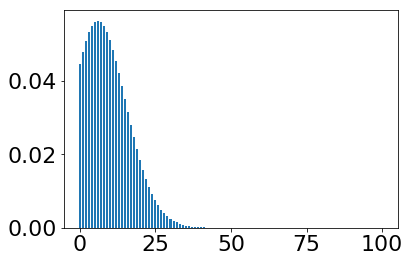

In [97]:
def update(hypo, prior, data):
    # for each hypothesis, calculate P(H) * P(D|H), or the prior times the likelihood
    
    # get pHpDH
    pHpDH = []
    pDH = likelihood(data, hypo)
    pSum = 0
    for i in range(0,len(hypo)):
        pHpDH.append(prior[i] * pDH[i])
        pSum = pSum + pHpDH[i]
        
    posterior = []
    for i in range(0,len(hypo)):
        if(pSum == 0):
            posterior.append(0)
        else:
            posterior.append(pHpDH[i]/pSum)
        
    return posterior

for d in data:
    prior = update(hypothesis, prior, d)

# plotting code
width = 1/1.5
plt.bar(hypothesis, prior, width)
# plt.bar(hypothesis, prior, alpha=0.85, color="#348ABD")
fig = plt.gcf()

# plotting code, decomment when you're done

In [98]:
def percentile(prior, hypothesis, percent):
    p = percent / 100
    
    total = 0
    
    for i in range(len(hypothesis)):
        total += prior[i]
        if (total >= p):
            return hypothesis[i]

In [99]:
# find the dataset mean
mean = 0
for i in range(0, len(prior)):
    mean = mean + hypothesis[i] * prior[i]
    
print("Mean", mean)
print(percentile(prior, hypothesis, 5),percentile(prior, hypothesis, 95))

Mean 9.991833361650112
1 23


## Answer the Questions available in Canvas.

If you're done, you can use the rest of the time to prepare for your case study, or consult with the professor with plans for the case study. Please do not disturb the other students who are still answering the exercise.

Of course, you're also free to play with the data on this workbook. Try changing p to a larger/smaller value, and see what happens to the Bayesian analysis. Maybe come back to it after a bit and refill the notebook. Some ideas in computational statistics come more easily once the coding part is trivial, and there's no other way to trivialize coding aside from practice.